In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
sns.set_style("whitegrid")
%matplotlib inline

<center><img src="https://www.irishtimes.com/polopoly_fs/1.3336205.1513945656!/image/image.jpg_gen/derivatives/box_620_330/image.jpg"></center>

<br>

# K Nearest Neighbours
***

A supervised machine learning algorith, K-Nearest Neighbours (KNN) is easy to understand and implement. A non-parametric learning algorithm, meaning no assumptions about the data are made, which proves useful as a lot of real-world data down not foollow amthematical or theoretical assumptions. Firstly, lets take a look at how the algorithms works. 

Plain and simple, KNN uses all of the data within a dataset to train itself then, taking a new data point as a test, it will calculate the distance (most often Euclidean) of the new point to those within the training data. It selects the K-nearest points, with $k$ being an interger. From the group of $k$ nearest points, it will find the majority and declare the classification to be in line with the majortity ruling. 

Euclidean distance is the length of a line segement between two points, it would be the most common interpertation of a measure of distance for humans to recognize. in the below plot, if we were to seek the distance between 2 points, say (2,2) &  (4, 4), the shortest possible distance would be the route horizontally along the red line c.

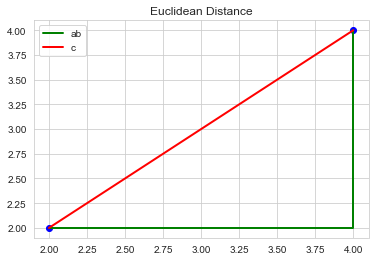

In [2]:
plt.plot([2, 4], [2, 4], 'bo')
plt.plot([2, 4, 4], [2, 2, 4], 'g-', label = "ab",linewidth=2)
plt.plot([2, 4], [2, 4], 'r-', label = "c", linewidth=2)
plt.title("Euclidean Distance")
plt.legend();

In other words, the Euclidean distance is the hypotheneus of a right angles triangle, and from it we can easily calculate the distance between two points on a 2-d plane once we know their co-ordinates, thanks to the pythagorean theorm: $a^2 + b^2 = c^2$. It is this calculation that KNN does to quantify the distance between the testing point and the existing data points in the training set. 

Once the $k$ nearest neighbours have been established, a prediction can be made in one of two ways, by returning the most common categorical varaible, or taking the average of a continuous varialbe, therefore KNN can be used for classification or regression.

Below I will implement the KNN algorithm using the abalone dataset, the aim is to determine the age of the abalone based on it's the measurements. First we will need to check the data in the dataset.

### Pre-processing and training the dataset
***

Below I will load in the Abalone dataset[], check the contents as see if there are any items to be cleaned up owthin the data, Null or Nan values etc. Check for outliers, view the general releationships between the data columns, and change any categorical varaibles. I used this [video](https://www.youtube.com/watch?v=5YHWuUsoKEo&t=28s) and their corresponding [workbook](https://www.kaggle.com/gcdatkin/full-prediction-of-abalone-attributes) for a full reference on processing the dataset. 

In [3]:
#First item is to load the dataset
df = pd.read_csv("datasets/abalone.data.csv", names =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# see the dataypes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
# Let's see the unique values
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [7]:
# make a copy of the dataset
abal = df.copy()

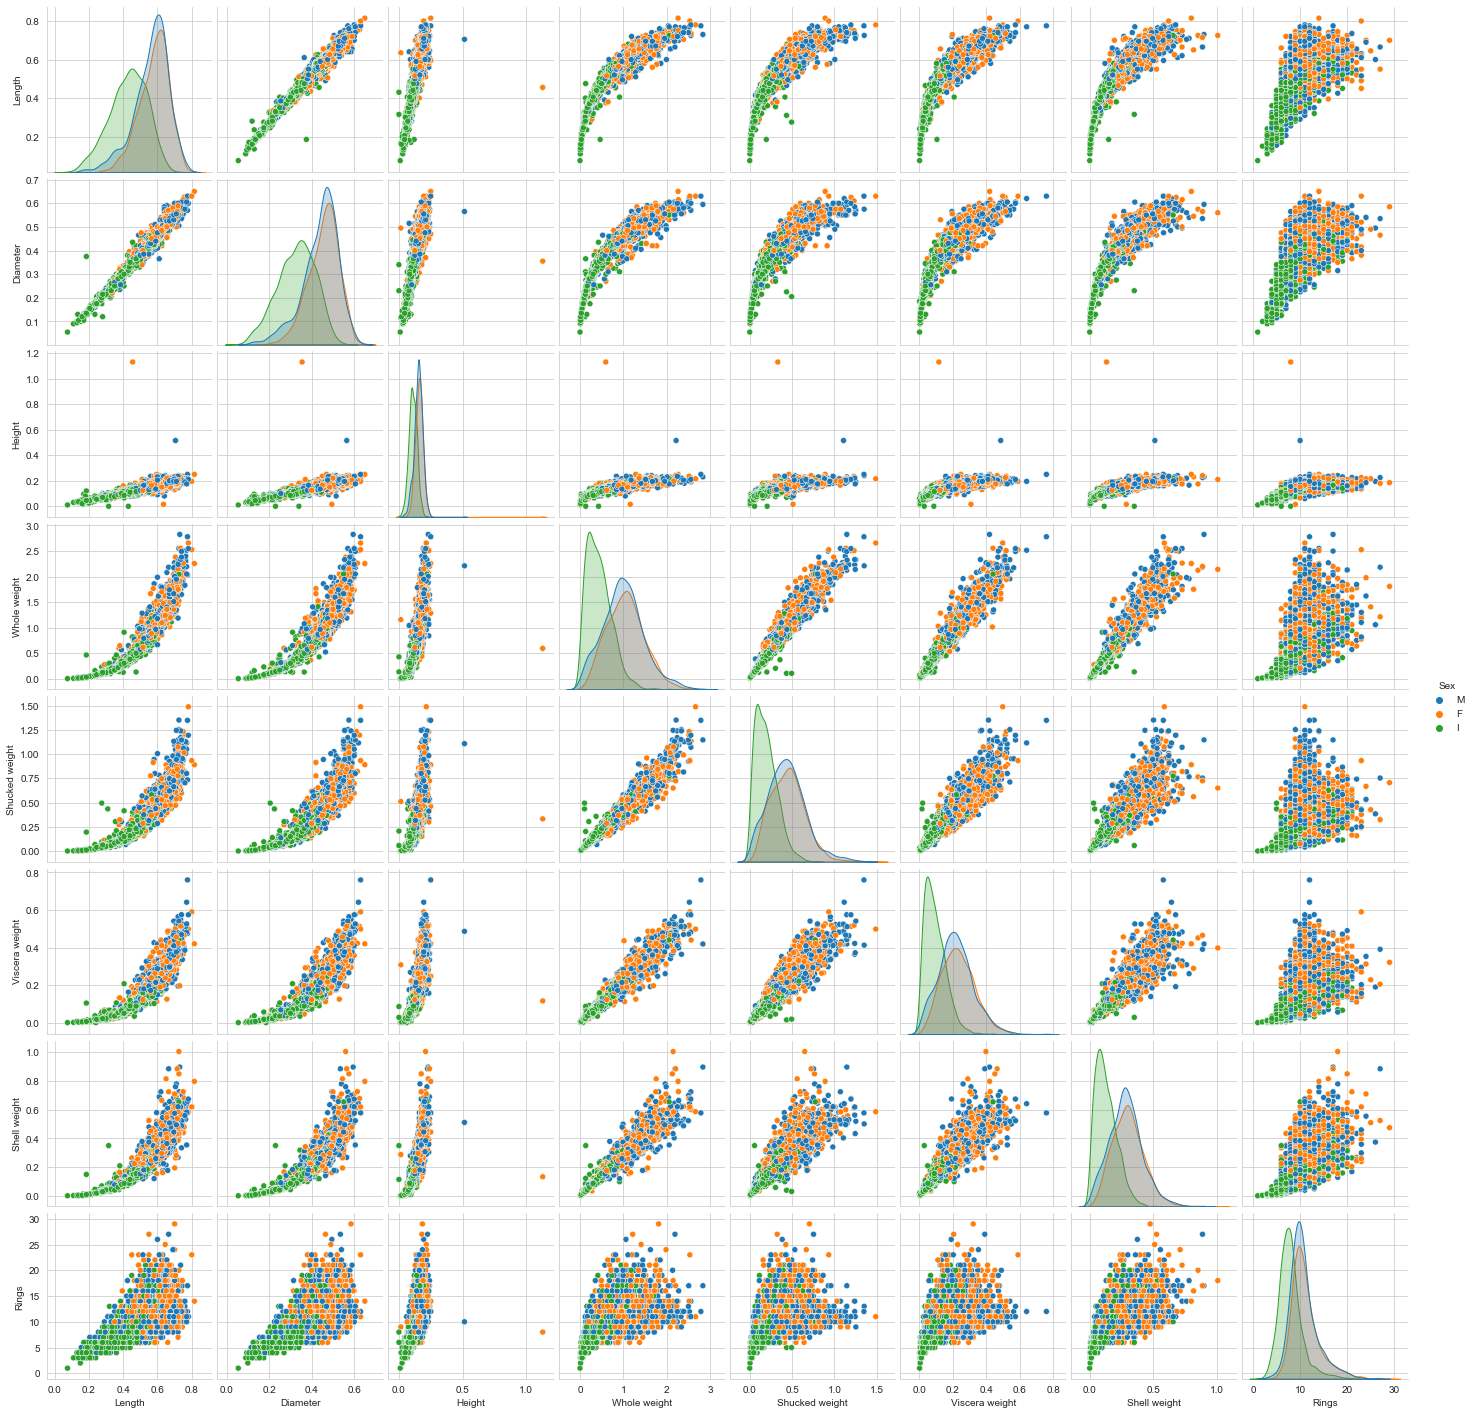

In [8]:
sns.pairplot(abal, hue = 'Sex');

The relationships between the columns make for some very enticing viewing for performaing machine learning, some very linear graphs appearing. Ther do appear to be some outliers present, 2 specifically in in the height graphs stick out massively. Let's isolate the height vs rings and see what is going on there.

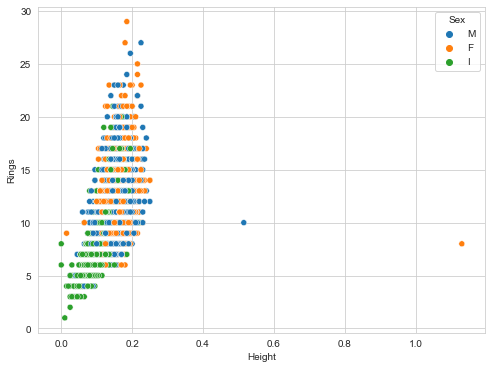

In [9]:
# Create plot to see outliers
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=abal, x="Height", y="Rings", hue = 'Sex');

In [10]:
# Remove the outliers of height > 0.4
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
abal = abal[abal['Height'] < 0.4] 

In [11]:
# Check the correlation between the columns
abal.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648,0.556827
Diameter,0.986804,1.000000,0.906086,0.925537,0.893385,0.899768,0.905271,0.574792
Height,0.899834,0.906086,1.000000,0.887712,0.836400,0.865710,0.888980,0.609634
Whole weight,0.925372,0.925537,0.887712,1.000000,0.969386,0.966311,0.955385,0.540859
Shucked weight,0.898184,0.893385,0.836400,0.969386,1.000000,0.931868,0.882681,0.421442
Viscera weight,0.903091,0.899768,0.865710,0.966311,0.931868,1.000000,0.907603,0.504234
Shell weight,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,1.000000,0.627815
Rings,0.556827,0.574792,0.609634,0.540859,0.421442,0.504234,0.627815,1.000000


In [12]:
# Below we are changing the 
dummies = pd.get_dummies(abal['Sex'])
abal = pd.concat([abal, dummies], axis =1)
abal = abal.drop('Sex', axis = 1)

In [13]:
#get some descriptive statistics of the data
abal.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.523965,0.407856,0.139189,0.828468,0.359195,0.180536,0.238791,9.934132,0.312814,0.321437,0.365749
std,0.120084,0.099230,0.038489,0.490027,0.221713,0.109534,0.139162,3.224802,0.463695,0.467084,0.481697
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093250,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.501750,0.252750,0.328750,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


In [14]:
#Split target from the df
target = abal["Rings"].copy()
feature = abal.drop("Rings", axis= 1).copy()

##### The Split
***

In order to avoid over-fitting, it is necessary to divide ML datasets into testing and training portions. The test postion comes in very helpful when tryong to gauge how successful your model is after fitting. the test_size parameter is what percentage of the feature and target are held aside in order to test the algorithm. Here I have nominated a 75% train -25% test split across the dataframe.  

In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.25, random_state=1)

##### Scaling
***

It is good practive to scale the features, machine learning algorithms work on numbers, not knowing what they represent, to the algorithm 100 grams and 100 cents there is no differnce. If there is a large integer value for the price of a good, the more significant numbers will begin to weigh in more than it should when training the model, not gving a true reflection of their actual importance. We us the [preprocessing.StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler) function to carry this out.

In [16]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
# apply the scaler top the test & train data
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature.columns)


### KNN Impelementation
***

Firstly we have to import our classifier, yes classifier, the ages column in the dataset may also be classed as a categorical variable. The parameter we are providing n_neighbours  is the number of neighbours evaluated for when classifying our new data. When the clasifier has been fit, we use the test portion of the data, and save the predictions made from those inputs. These are then compared against the known values and we are able to determine if the model we produced is predicting correctly.[3]

In [17]:
# initialize the function
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
# Run the reseverd test data through our model to predict the ages
y_pred = knn_class.predict(X_test)

In [19]:
# Save the confusion matrix for graphing
confus = confusion_matrix(y_test, y_pred)

In [20]:
# See the score of the model by comparing the actual classes against the predictions
knn_score = knn_class.score(X_test,y_test)
print(f"KNN Classification Model Score: {knn_score:.6f}")

KNN Classification Model Score: 0.220307


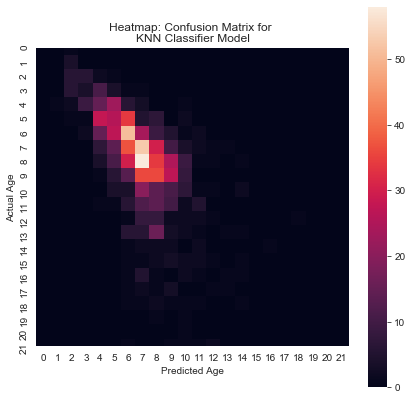

In [21]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.heatmap(confus,
           square=True, ax=ax)
ax.set_title('Heatmap: Confusion Matrix for \nKNN Classifier Model')
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

In [22]:
# https://towardsdatascience.com/k-nearest-neighbors-94395f445221
# Below we will test the Classifier for multiple values of n_neighbours

knn_n_range = []

for i in range(1,21):
    knn_class = KNeighborsClassifier(n_neighbors=i)
    knn_class.fit(X_train, y_train)
    test_score = knn_class.score(X_test,y_test)
    train_score = knn_class.score(X_train,y_train)
    knn_n_range.append((i, test_score ,train_score))
df = pd.DataFrame(knn_n_range, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.194444     1.000000
1    2    0.205939     0.591185
2    3    0.190613     0.502395
3    4    0.198276     0.460236
4    5    0.220307     0.433088
5    6    0.227011     0.412648
6    7    0.206897     0.397956
7    8    0.224138     0.395720
8    9    0.223180     0.378793
9   10    0.219349     0.374002
10  11    0.230843     0.368253
11  12    0.234674     0.366337
12  13    0.238506     0.365698
13  14    0.242337     0.362185
14  15    0.246169     0.356755
15  16    0.252874     0.357713
16  17    0.236590     0.355797
17  18    0.234674     0.355158
18  19    0.238506     0.348770
19  20    0.227969     0.343341


That's a pretty terrible score all around, I would expect it to be quite a bit better if it's selecting 20 of it's nearest neighbours to evaluate the class, the saving grace, is that the tatining scores are not very reassuring that this was the correct dataset to apply to KNN in any shape of form.

<br>
<br>
<br>
<br>

<center><img src="https://media.istockphoto.com/vectors/decision-tree-icon-vector-id1094185438?k=20&m=1094185438&s=612x612&w=0&h=GoRnJsnDrkWZXPPTiJojusC_UGP1aVT1g-rO4rUKrzM="></center>
<br>

# Decision Trees
***

The most powerful and widely used tool for categorization and prediction is the decision tree. A non-parametric, supervised learning method, a decision tree is a flowchart-like tree structure in which each internal node represents a test of a quality, each branch reflects the test's conclusion, yes or now, pass or fail, and each leaf or terminal node stores a class label. By separating the source dataset into subgroups based on an attribute value test, a tree can be "trained", the method used to continually repeating the method on all of the subsets is called recursive partitioning. When all of the subsets at a node have the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is complete. Decision tree classifiers suit exploratory knowledge discovery, due to the lack of need for domain expertise, or parameter setting. They suit high dimensional data and are, in general, quite accurate models.

Within decision trees instances are classified by sorting them down the tree from the root to a leaf node, which provides the classification.
An instance is classified by starting at the root node of the tree, checking the attribute specified by this node, and then progressing along the tree branch according to the attribute value, every time progress is made, we are met with another binary choice (decision) node until  we reach what is known as the leaf node, this is the extremeity of the tree and no further partition will take place.[1]
<br>

<center><img src="https://files.ai-pool.com/a/ec49d6befafe52908fa7bc7c983596a1.png"></center>

<br>

To demonstrate the decision tree process we are first going to synthesis some data and get a handle on how the dcision tree process works. 

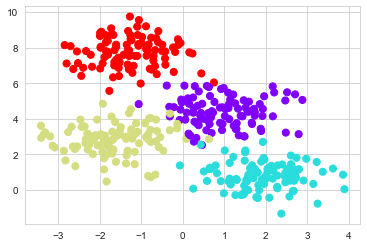

In [23]:
X, y = make_blobs(n_samples=400, centers=4,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A decision tree model, built on the above, will cylce through the data and split it across an axis to assign a label to each part, according to the majority occupier, so a line drawn across the points x= (-4, 6) & y =(6, 6) will be assinged a label of red in the graph. As all items above this line would be correctly classified, there is no need for further subdivide this section, this is our frist leaf node. The next split we could see could be a line from x =(0, 0, 6) to y = (0, 2, 2) and extending right to the edge of our dataset. This would indicate the first two partitions made in the model. Of course not all will be as simple and stright forward as these.

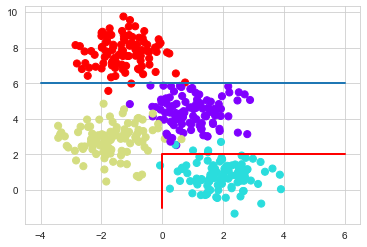

In [24]:
# add line (-4, 6) & (6, 6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.plot([-4, 6], [6, 6], linewidth=2)
plt.plot([0, 0, 6], [-1, 2, 2], 'r-', linewidth=2);

Below we will use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) estimator from Sklearn to fit a decision tree to the mocked up data. I have taken a function to viasualize the estimator, in it's entirety from Jake Vander Plas' website's piece on decision trees, available [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html).

In [25]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    #plot xx, yy, Z values
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

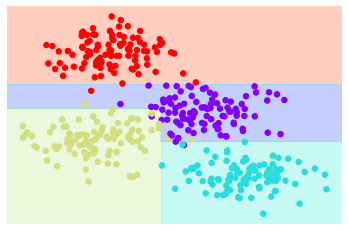

In [26]:
# Let's visualis=ze a depth of 3 first
visualize_classifier(DecisionTreeClassifier(max_depth= 3), X, y)

So our initial 2 lines drawn above were not far off the end product, as at a depth of 3 we can cleary see something along the lines of what we crafted above. As we go to further depths, you can clearly see the complexity of the regions begin to emerge, the thin streak going through the yelllow region and the the purple streaks through the blue. This is an example of over-fitting, and what happening here is that the outliers are causing such constructs. Such over-fitting can lead to a snug fit on the training data, but prove to be quite poor when generalizing unseen data[3]. One method to alleviate the inconsistencies related to over-fitting is to train two or more models on subsets of the same dataset. 

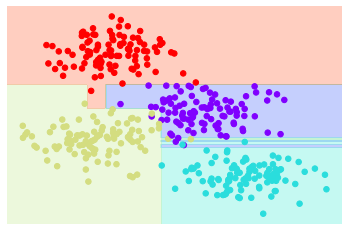

In [27]:
# Let's visualis=ze a depth of 3 first
visualize_classifier(DecisionTreeClassifier(max_depth= 5), X, y)

Below we will explore what the visualisation look like if we split the data up and pass each half as a parameter to our classifier.

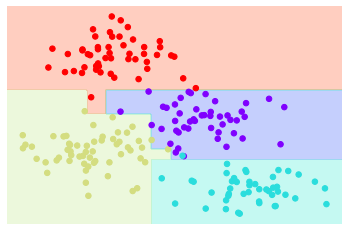

In [28]:
# Split the data in half and visualize
X1, y1 = X[:201], y[:201]
X2, y2 = X[201:], y[201:]

visualize_classifier(DecisionTreeClassifier(max_depth= 5), X1, y1)

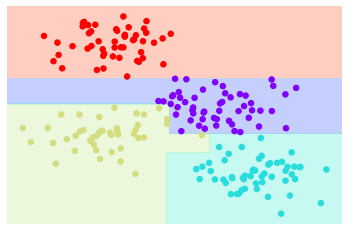

In [29]:
# visualise second half
visualize_classifier(DecisionTreeClassifier(max_depth= 5), X2, y2)

Splitting out the data in this manner can become tedious however, we can see what benefit it could have for seeing where the certainty and uncrtainty could lie for classification. Luckily a concept based on this idea has been around for quite some time. Somewhat similar to what has been completed above, but there are some important differences also. 

<center><img src="https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/random-forest/img-2.png"></center>

### Bagging & Random Forrests
***

There are some very strong similarities in the data, which is again, just systhesised, however, as these are two subsets of the same dataset, it is clear that there is some real overlep between both. This concept of multiple groups of over-fit estimators being used to reduce the negative aspects of over-fitting, is called [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html). Bagging is an "ensemble meta- estimator, that fits base classifiers each on a random subset of the original dataset."[4] It introduces randomization into the structure of the subsets, and then makes an ensemble out of it. Using bagging in conjuction to decision trees creates a decision forest. Bagging is short of bootstrap aggregation, and is an ensemble machine learning algorithm, meanong it combines base models into more complex and accurate works. Basically, it is based on the idea of a  bootstrap sample, a sample of a dataset with replacement, which creates multiple samples and in the end reports the statistics of the whole collection of the samples.[5]

In the below code, the randomizer will fit each of the estimators with 75% of the training points. 

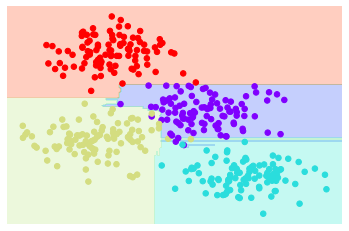

In [30]:
#initialize decision tree
dec_tree = DecisionTreeClassifier()
# create random froest of 50 estimators, taking a 75% share of the overall amount of data
bag = BaggingClassifier(dec_tree, n_estimators=100, max_samples=0.75, random_state=1)

#fit the mdoel
bag.fit(X, y)
#visualize
visualize_classifier(bag, X, y)

While the model looks to fit the dataset much better, I personally am still quite surprised to see that the visualisation still contains stipes across the some of the colour blocks. From reading a bit further, it appears that there may not be sufficient randomness within the selections of the 75% split (100% will still show the same), the [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)[6] is set up to assist with this with an optimized ensemble of randomized decision trees built in.

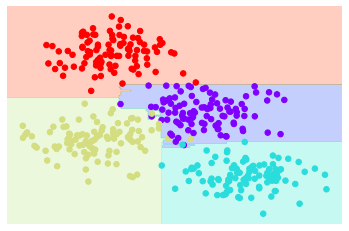

In [31]:
# set the randomforestclassifier up for 100 estimators
randf_model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(randf_model, X, y);

If I was to get out a pencil and a sheet of paper to draw lines seperating each of the blobs into 4 sections, I would think the end result would look somewhat similar to this, much more intuative. So far we have only looked at classification models with decision trees, below I will breifly touch on regression modelling.



<br>
<br>
<br>
<br>
<br>

## Linear Regression
***

Linear regression is a form of predictive modelling, used to make predictions based on patterns in exisiting data, predictive modelling iteslf is a form of Machine learning (ML). "Regression" is in reference to any modelling that is related to real number prediction, in contrast to prediciting a categoric or class variable, which is called classification. As the name states linear regression is about fitting a line, or best fit line to a series or collection of data-points, therefore we can reduce the formula for the line down to our mathematical standard: 
<center>$y = mx + c$</center>
While the above applies to a straight line only, we will just begin our explanation at this point. The model aims to fit a line to the minimum vertical distance from the data points to the regression line. Lets take a look at a visualisation in order to see the model at work, I have chosen the "mtcars" dataset, which is loaded from file, however the online link is also avaialbe in the references below[2][3]:

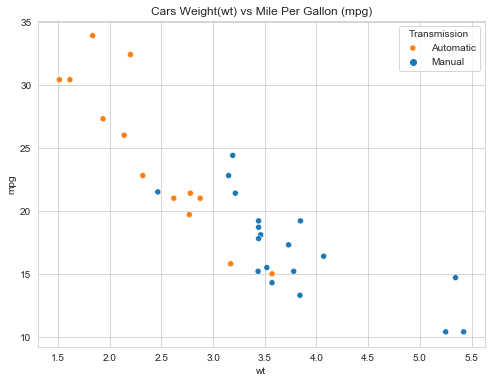

In [32]:
## Load in the dataset, found: https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
mtcars = pd.read_csv("datasets/mtcars.csv")

## scatter plot of datapoints of weight and mpg with a hue of manual or automatic transmission
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.legend(title='Transmission', loc='upper right', labels=['Automatic', 'Manual']);

From observing the data of weight vs miles per gallon, we can see there appears to be a somewhat linear relationship between these two factors. For my own curisostiy I thought I'd see what the difference between automatic and manual was in the dataset, it really added an extra dynamic to the visuals for the data, so I left it in. Let's see what sort of a line our linear regression comes up with then ran on the dataset, we weill use Sklearn's linear regression model. 

In [33]:
# create model
regression_model = linear_model.LinearRegression()

# Train model
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

intercept = regression_model.intercept_
coefficient = float(regression_model.coef_)

print(f"Model y-intercept {intercept:.6f}, model coefficients {coefficient:.6f}")

Model y-intercept 37.285126, model coefficients -5.344472


The output provides our y-intecept value, ie when x = 0, y will = 37.28, the coefficient is the slope of the line. We therefore have our best-fit line equation for the comparison of car weight vs fuel consumption:
<center>$y = -5.344x + 37.285$</center>

In [34]:
x1 = mtcars["wt"]
y1 = -5.344*x1 + 37.285

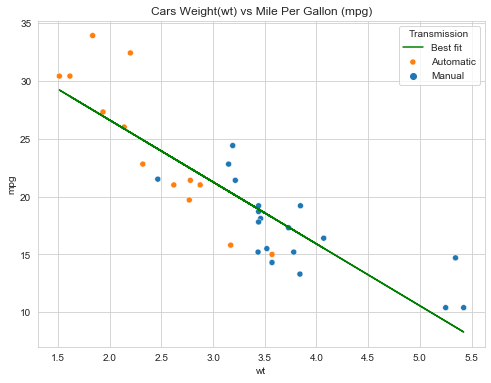

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.plot(x1, y1, 'g-', linewidth=1.5)
plt.legend(title='Transmission', loc='upper right', labels=['Best fit','Automatic', 'Manual']);


We can look at the score[4], which is the coefficient of determination, or $R^2$, ranging from 0 to 1 with 1 being the best. It describes the proportion of vairance in the reponse variable that is explained by the model[5]. The differences between the predicted and actual points is what the R-squared measure is based on. Called residuals, they can be extracted by making predcitons, and then taking away the actual value from the prediction. Which I will do below. 

In [36]:
#Get the score of the model
mtcar_reg_score = regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])
print(f"The model's R-squared score is: {mtcar_reg_score:.6f}")

The model's R-squared score is: 0.752833


In [37]:
#Train and predict the results, extracting the residuals

train_pred = regression_model.predict(X= pd.DataFrame(mtcars["wt"]))

residual = mtcars["mpg"] - train_pred

residual.describe()

count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

$R^2$ in theScikit-learn documentaion is defined as[6]:
<center>$(1 - \frac{u}{v})$</center>
 <center>"where $u$ is the residual sum of squares ((y_true - y_pred)** 2).sum() and $v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()."</center>
 So we need to square and sum our residual values (reidual above), and the sum of the squares of the difference between each datapoint and the data's mean (our acutal values).

In [38]:
pred_residuals = (residual**2).sum()

real_total = ((mtcars['mpg'] - mtcars['mpg'].mean())**2).sum()

r_square = (1-(pred_residuals/real_total))

print(f"The model's R-squared score is: {r_square:.6f}")

The model's R-squared score is: 0.752833


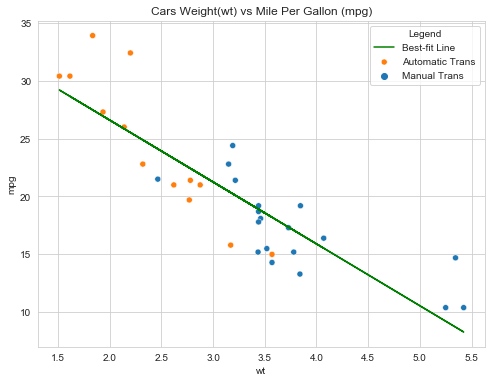

In [39]:
# Adding best-fit line as per the below
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.plot(mtcars["wt"], train_pred, 'g-', linewidth=1.5)
plt.legend(title='Legend', loc='upper right', labels=['Best-fit Line','Automatic Trans', 'Manual Trans']);

It is important to note that the data should be checked for outliers, and processed to remove any that have a large influence on the regression.
Further while the relationship of weight and mpg may seem to be linear in nature, a striaght line may not be the best manner to fit in all cases, we can test this simply by creating a probability plot, we do this by importing stats.probplot() from the scipy.stats library.

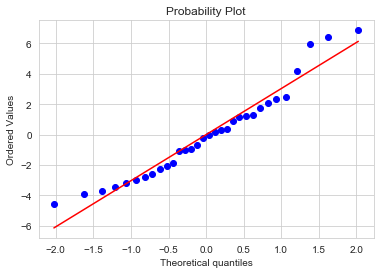

In [40]:
stats.probplot(residual, dist="norm", plot=plt)
plt.show();

Deviations from the straight line here suggest departures from normality. At both ends the points seem to taper off the line in opposite directions, there could be many, many reasons for this. however, with s slightly emergent "S" shape could indicate a binomial distribution.[7]

Once we have made our predictions, it is essential practice to  see how the model performed, it's all well and good making models to predict the weather, but in order to have any use they must be accurate. One method of doing so is the Root Mean Squared Error[8]. This is a rick function, that determines the root of the average squared difference betweem the predicted and the actual value of a feature or variable. We will use Sklearn's function for the mean square error and raise it to the power of 0.5 for the root.
The best possible score is 0.00, with a score of less than 180 being adjudged to be good or moderate.[9]

In [41]:
RMSE = mean_squared_error(train_pred, mtcars["mpg"])**0.5
print(f"The RMSE of the mtcars model is: {RMSE:.6f}")

The RMSE of the mtcars model is: 2.949163


### Polynomial Regression
***

Linear Regression does not stop at simple straight line fits, it can handle much more complex structures. If our data displays less linear relationships, our linear model can be adapted by fitting a curved line. This style of linear regression is called polynomial regression. Let's see if we can get a better RMSE score on a polynomial fit. We will do pretty much the exact same as before, except we will include the cars weight squared in the argument for X when fittign the model.

In [42]:
# initialise model
polynom_model = linear_model.LinearRegression()

# add data with squared values
poly_df = pd.DataFrame([mtcars['wt'], mtcars["wt"]**2]).T

# fit the model
polynom_model.fit(X = poly_df, 
               y = mtcars["mpg"])

poly_intercept = regression_model.intercept_
poly_coefficient = float(regression_model.coef_)

#Get the score of the model
mtcar_poly_reg_score = polynom_model.score(X = poly_df,  y = mtcars["mpg"])
print(f"The model's R-squared score is: {mtcar_poly_reg_score:.6f}")

The model's R-squared score is: 0.819061


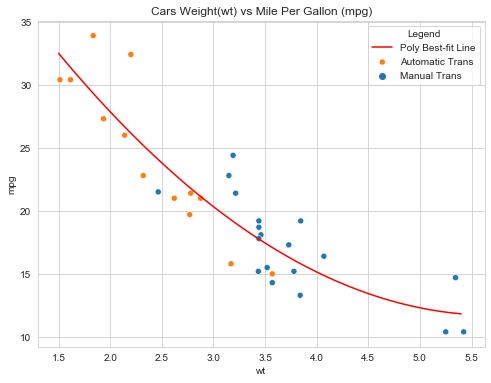

In [43]:
poly_line_range = np.arange(1.5, 5.5, 0.1)

poly_pred= pd.DataFrame([poly_line_range, poly_line_range**2]).T

poly_y_vals = polynom_model.predict(X = poly_pred)

# Adding best-fit line as per the below
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.plot(poly_line_range, poly_y_vals, 'r-', linewidth=1.5)
plt.legend(title='Legend', loc='upper right', labels=['Poly Best-fit Line','Automatic Trans', 'Manual Trans']);

In [44]:
poly_predictions = polynom_model.predict(X=poly_df)

In [45]:
RMSE = mean_squared_error(poly_predictions, mtcars["mpg"])**0.5
print(f"The RMSE of the polynomial mtcars model is: {RMSE:.6f}")

The RMSE of the polynomial mtcars model is: 2.523300


References:

    KNN:
    1. https://archive.ics.uci.edu/ml/datasets/abalone
    
    2. https://www.youtube.com/watch?v=5YHWuUsoKEo&t=28s
    
    3. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
        
      Decision trees:
      
    1. https://www.geeksforgeeks.org/decision-tree/
    
    2. https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html#
    
    3. https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
    
    4. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    
    5. https://machinelearningmastery.com/bagging-ensemble-with-python/
    
    6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
        
   Linear Regression:
   
    1. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/least-squares-regression-line/ 
    
    2. https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv 
    
    3. https://cran.r-project.org/web/packages/explore/vignettes/explore_mtcars.html
    
    4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
    
    5. https://www.kaggle.com/hamelg/python-for-data-27-linear-regression
    
    6.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
    
    7. https://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    
    8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    
    9. https://www.askpython.com/python/examples/rmse-root-mean-square-error
   
    